# Equalization of a Headphone

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters module Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

The following example discusses the equalization of the transfer function from a headphone to the microphone of a head and torso simulator (HATS). The microphone is located at the entry of the blocked ear-canal of the artificial ear of the HATS. The equalization of headphone transfer functions (HpTFs) is important in virtual acoustics, since many techniques assume that the characteristics of the headphone are ideal.

First the pre-recorded impulse response of a headphone is loaded and truncated

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io as sio

N = 130

data = np.load('HpTF_K601_14539.npz')
fs = data['fs']
h = data['h']
h = h[:N]

### Impulse Response and Transfer Function

The impulse response $h(t)$ from the headphone to the microphone of the ear of the HATS is plotted for illustration

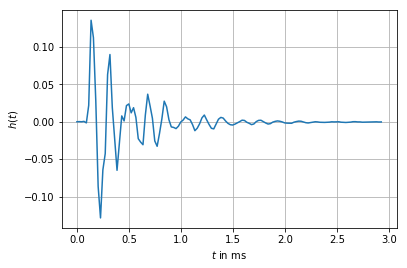

In [2]:
th = 1/fs * np.arange(N)
plt.plot(th*1000, h)
plt.xlabel(r'$t$ in ms')
plt.ylabel(r'$h(t)$')
plt.grid()

The discrete Fourier transform of the impulse response is computed and the magnitude response $H(f)$ of the headphone is plotted

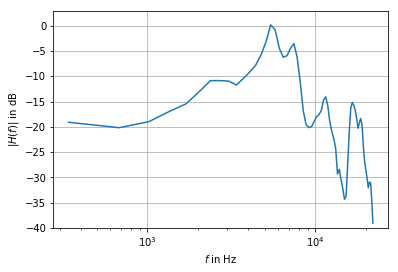

In [3]:
H = np.fft.rfft(h)
fh = np.fft.rfftfreq(len(h), 1/fs)

plt.plot(fh, 20*np.log10(np.abs(H)))
plt.gca().set_xscale('log')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'$|H(f)|$ in dB')
plt.ylim([-40, 3])
plt.grid()

### Computation of the Inverse Filter

The equalization filter $g(t)$ for the measured HpTF is computed by designing a filter with the window technique using a regularized version of the exact inverse filter. This way the maximum gain is limited and the equalization filter is a stable linear-phase filter.

In [4]:
# regularization
R = 0.001 * np.ones_like(H)  
G = np.conj(H)/(np.abs(H)**2 + R)
# design of linear-phase filter
g = sig.firwin2(1025, fh, np.abs(G), nyq=fs/2, antisymmetric=False)

### Impulse Response and Transfer Function of Inverse Filter

The impulse response $g(t)$ of the equalization filter is plotted

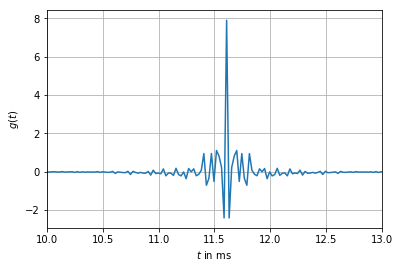

In [5]:
tg = 1/fs * np.arange(len(g))
plt.plot(tg*1000, g)
plt.xlim([10, 13])
plt.xlabel(r'$t$ in ms')
plt.ylabel(r'$g(t)$')
plt.grid()

The discrete Fourier transform of the equalization filter is computed and the magnitude response of the filter is plotted together with the exact inverse filter

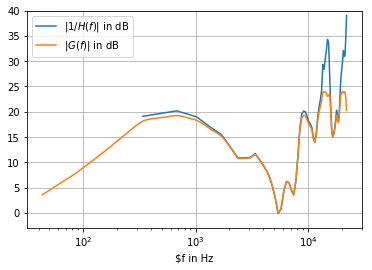

In [6]:
G = np.fft.rfft(g)
fg = np.fft.rfftfreq(len(g), 1/fs)

plt.plot(fh, 20*np.log10(np.abs(1/H)), label=r'$|1/H(f)|$ in dB')
plt.plot(fg, 20*np.log10(np.abs(G)), label=r'$|G(f)|$ in dB')
plt.gca().set_xscale('log')
plt.xlabel(r'$f in Hz')
plt.legend(loc=2)
plt.ylim([-3, 40])
plt.grid()

### Overall Impulse Response and Transfer Function

The resulting overall impulse response $h_a(t) = h(t) * g(t)$ is computed by convolving both the impulse response of the headphone and the impulse response of the equalization filter with each other. The resulting impulse response is plotted

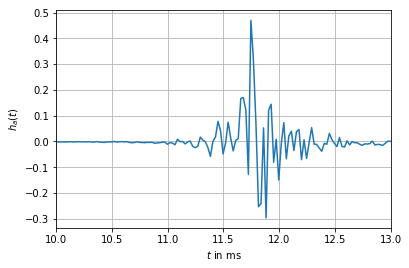

In [7]:
ha = np.convolve(h, g, mode='full')

ta = 1/fs * np.arange(len(ha))
plt.plot(ta*1000, ha)
plt.xlabel(r'$t$ in ms')
plt.ylabel(r'$h_a(t)$')
plt.xlim([10, 13])
plt.grid()

The discrete Fourier transform of the overall impulse response is computed and the magnitude of the overall transfer function $H_a(f)$ is plotted

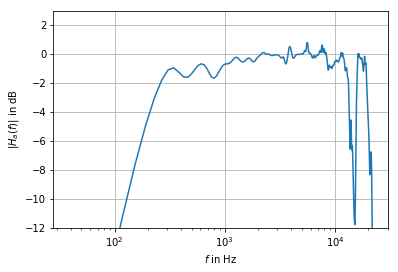

In [8]:
Ha = np.fft.rfft(ha)
fa = np.fft.rfftfreq(len(ha), 1/fs)

plt.plot(fa, 20*np.log10(np.abs(Ha)))
plt.gca().set_xscale('log')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'$|H_a(f)|$ in dB')
plt.ylim([-12, 3])
plt.grid()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Selected Topics in Audio Signal Processing* by Sascha Spors.